## Data Pre-Processing

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Memuat dan memeriksa Data

# Memuat dataset
data = pd.read_csv('/content/Data Official Statistics.csv')
# Menampilkan 5 baris pertama
print(data.head())
# Informasi dataset
print(data.info())

         PROVINSI   TPT  TPP_SD  TPP_SMP  TPP_SMA         UPAH  PENGELUARAN
0            ACEH  6.03   99.08    94.55    74.46  2828145.778     874702.5
1  SUMATERA UTARA  5.89   98.75    94.35    74.43  2826233.443     951545.5
2  SUMATERA BARAT  5.94   95.81    90.65    68.64  2980044.498    1038088.5
3            RIAU  4.23   98.09    90.52    67.79  3284759.902    1139477.0
4           JAMBI  4.53   97.76    89.35    66.62  2890582.041    1063650.5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PROVINSI     34 non-null     object 
 1   TPT          34 non-null     float64
 2   TPP_SD       34 non-null     float64
 3   TPP_SMP      34 non-null     float64
 4   TPP_SMA      34 non-null     float64
 5   UPAH         34 non-null     float64
 6   PENGELUARAN  34 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.0+ KB
None


In [ ]:
data.shape

(34, 7)

In [ ]:
# Memeriksa missing values
print(data.isnull().sum())

PROVINSI       0
TPT            0
TPP_SD         0
TPP_SMP        0
TPP_SMA        0
UPAH           0
PENGELUARAN    0
dtype: int64


In [ ]:
# Memeriksa jumlah duplikasi data
data.duplicated().sum()

0

## Descriptive Analysis and Data Visualization

In [ ]:
# Melihat deskripsi data
data.describe()

,TPT,TPP_SD,TPP_SMP,TPP_SMA,UPAH,PENGELUARAN
count,34.000000,34.000000,34.000000,34.000000,3.400000e+01,3.400000e+01
mean,4.613824,96.746471,89.552059,65.812353,3.329403e+06,1.099228e+06
std,1.419065,3.383889,5.452482,10.687802,7.056478e+05,2.906281e+05
min,2.270000,80.090000,67.120000,39.500000,2.461412e+06,7.030360e+05
25%,3.487500,96.052500,88.107500,60.845000,2.843755e+06,9.152090e+05
50%,4.320000,97.795000,90.285000,67.015000,3.135042e+06,9.964062e+05
75%,5.762500,98.427500,93.010000,69.792500,3.490948e+06,1.205191e+06
max,7.520000,99.090000,97.020000,89.690000,5.505311e+06,2.263768e+06


Variabel TPT memiliki 0 outlier.
Variabel TPP_SD memiliki 1 outlier.
Variabel TPP_SMP memiliki 1 outlier.
Variabel TPP_SMA memiliki 5 outlier.
Variabel UPAH memiliki 4 outlier.
Variabel PENGELUARAN memiliki 1 outlier.


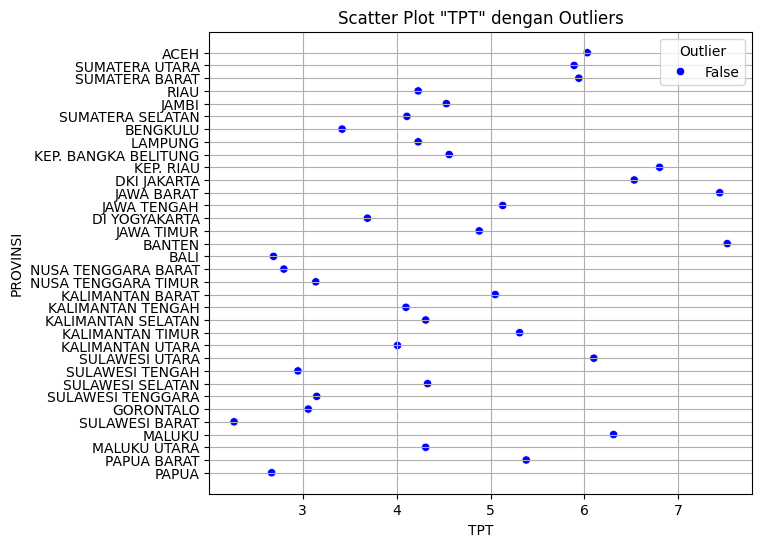

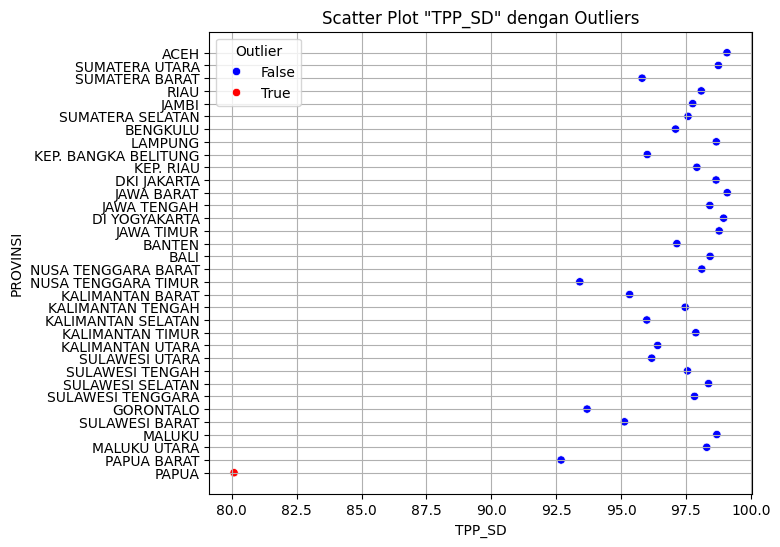

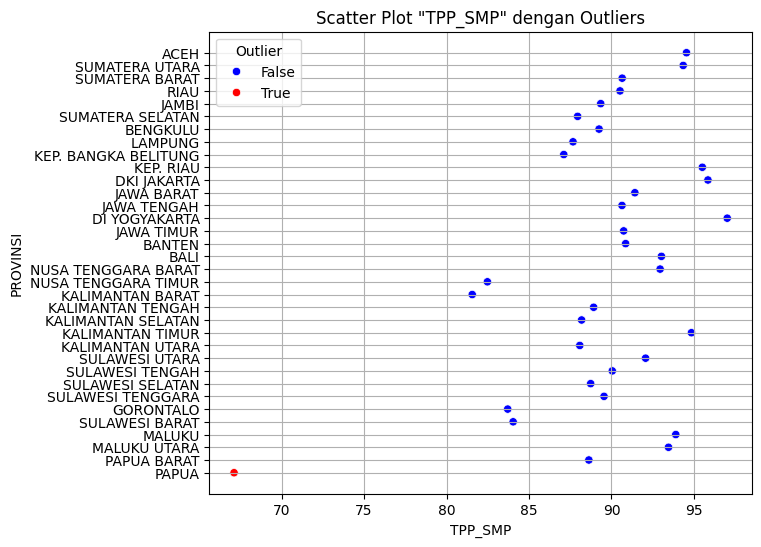

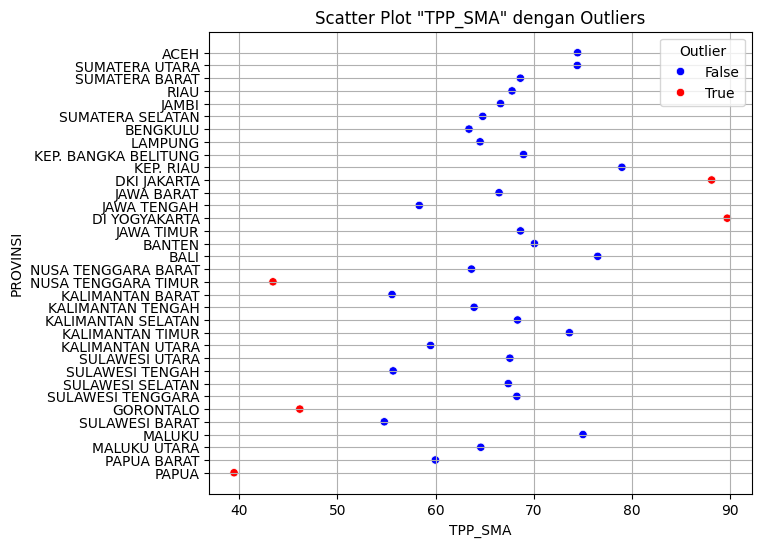

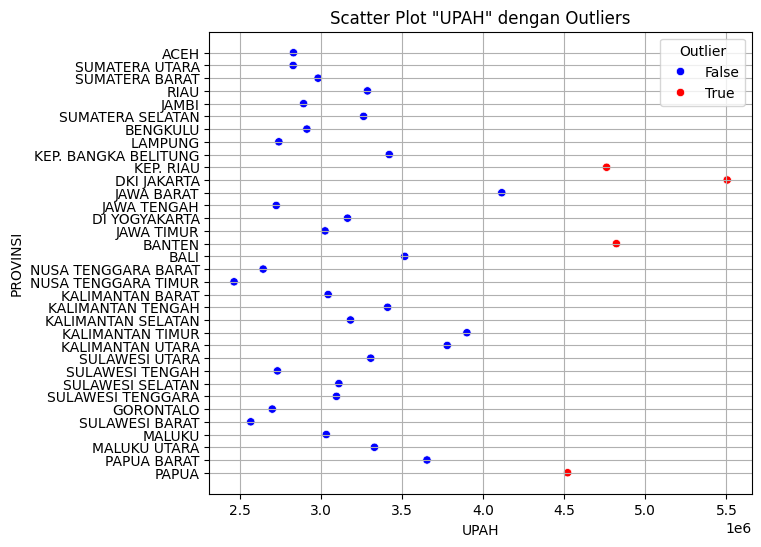

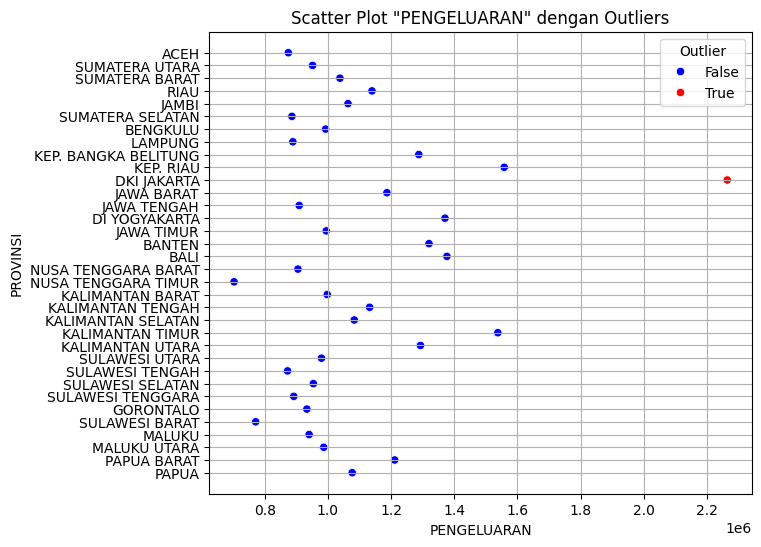

In [ ]:
# Membuat Scatterplot dengan pendeteksian outlier

# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers(data, column):
    Q1, Q3 = data[column].quantile(0.25), data[column].quantile(0.75)
    IQR = Q3 - Q1
    return (data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))

# Deteksi outlier dan jumlahnya
numerical_columns = data.select_dtypes(include=['float64']).columns
outliers_summary = {col: detect_outliers(data, col) for col in numerical_columns}
for col, outliers in outliers_summary.items():
    print(f"Variabel {col} memiliki {outliers.sum()} outlier.")

# Menandai dan memvisualisasikan outlier
X, y = data.drop('PROVINSI', axis=1), data['PROVINSI']
for column in X.columns:
    outliers = detect_outliers(X, column)
    plt.figure(figsize=(7, 6))
    sns.scatterplot(x=X[column], y=y, hue=outliers, palette={False: "blue", True: "red"})
    plt.title(f'Scatter Plot "{column}" dengan Outliers')
    plt.xlabel(column)
    plt.ylabel('PROVINSI')
    plt.grid(True)
    plt.legend(title="Outlier")
    plt.show()

Outlier pada setiap variabel diputuskan untuk dibiarkan karena merepresentasikan kondisi nyata yang valid dari data sehingga tetap relevan untuk analisis distribusi dan interpretasi hasil

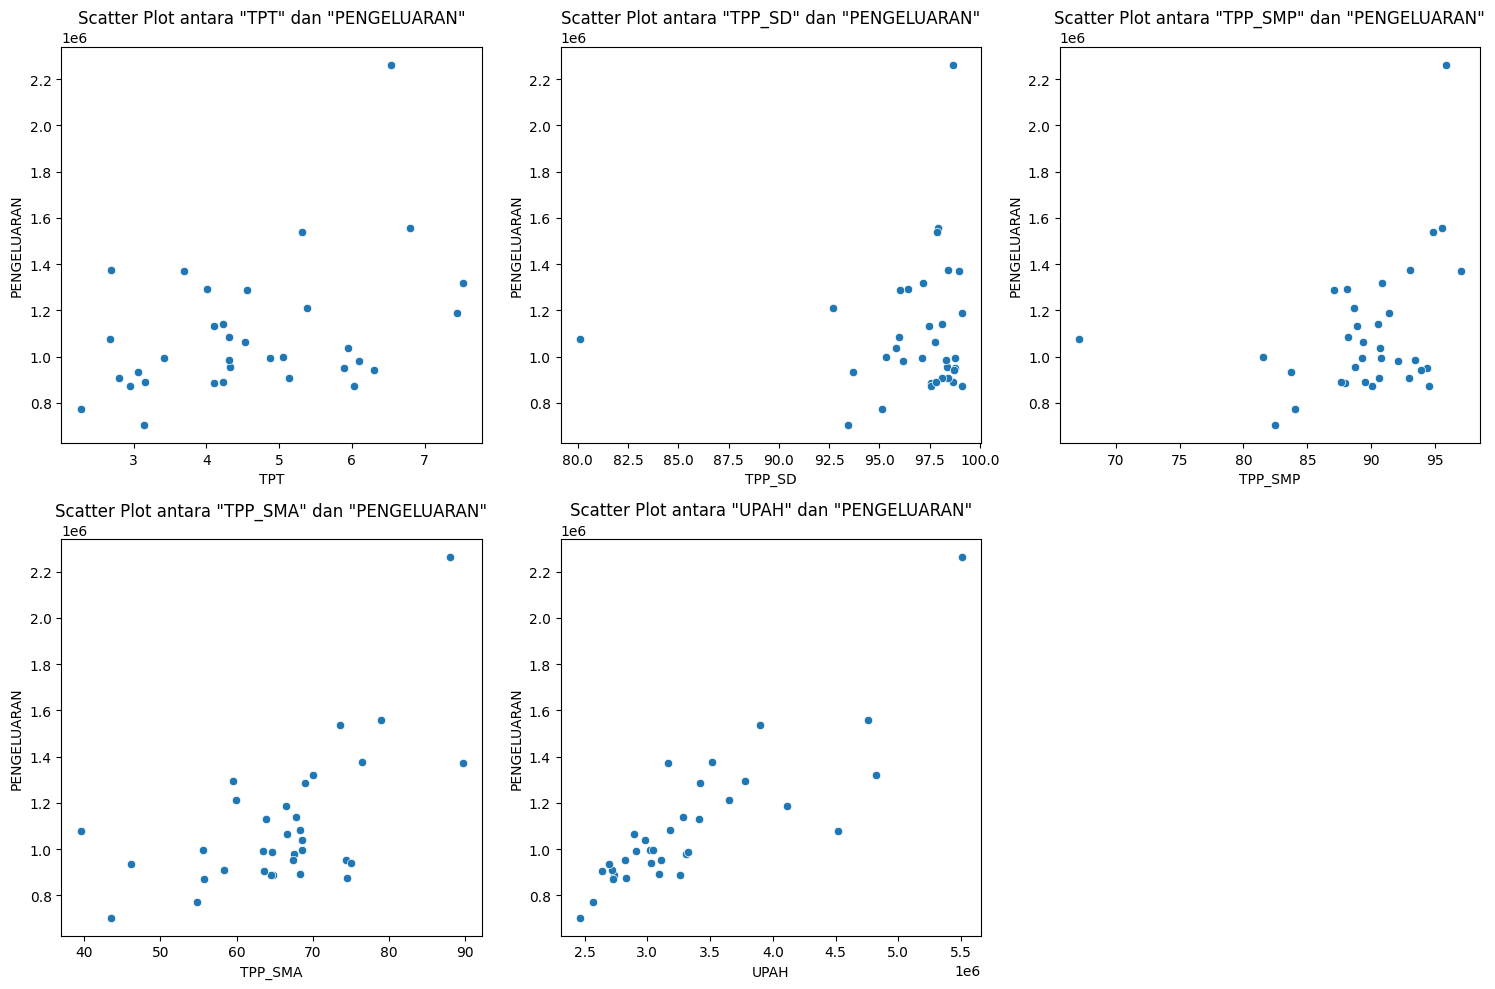

In [ ]:
# Membuat scatter plot antara variabel prediktor dan variabel target 'PENGELUARAN'
# Memisahkan prediktor (X) dan target (y)
X = data.drop(['PENGELUARAN', 'PROVINSI'], axis=1)
y = data['PENGELUARAN']

# Variabel untuk pengaturan grid
n_rows, n_cols = 2, 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

# Membuat scatter plot untuk setiap kolom prediktor
for i, column in enumerate(X.columns):
    sns.scatterplot(ax=axes[i], x=X[column], y=y)
    axes[i].set_title(f'Scatter Plot antara "{column}" dan "PENGELUARAN"')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('PENGELUARAN')
for j in range(len(X.columns), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


Variabel TPT memiliki 0 outlier.
Variabel TPP_SD memiliki 1 outlier.
Variabel TPP_SMP memiliki 1 outlier.
Variabel TPP_SMA memiliki 5 outlier.
Variabel UPAH memiliki 4 outlier.
Variabel PENGELUARAN memiliki 1 outlier.


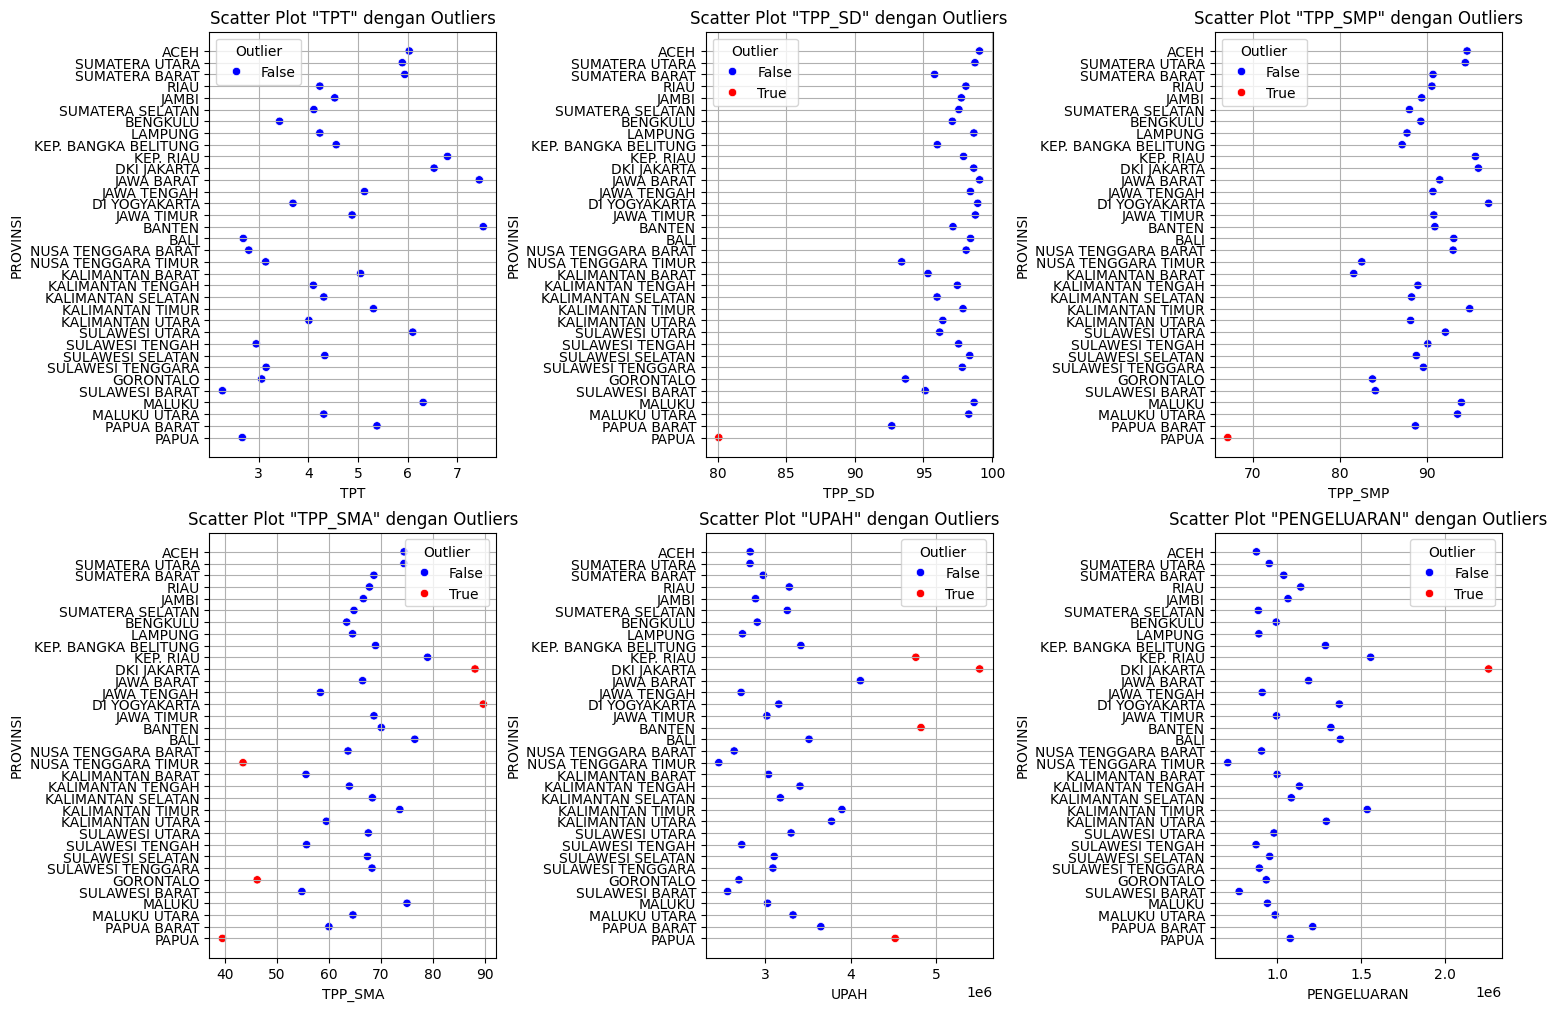

In [ ]:
# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers(data, column):
    Q1, Q3 = data[column].quantile(0.25), data[column].quantile(0.75)
    IQR = Q3 - Q1
    return (data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))

# Deteksi outlier dan jumlahnya
numerical_columns = data.select_dtypes(include=['float64']).columns
outliers_summary = {col: detect_outliers(data, col) for col in numerical_columns}

for col, outliers in outliers_summary.items():
    print(f"Variabel {col} memiliki {outliers.sum()} outlier.")

# Menandai dan memvisualisasikan outlier dalam tabel 2x3
X, y = data.drop('PROVINSI', axis=1), data['PROVINSI']
columns_to_plot = X.columns[:6]  # Ambil maksimum 6 kolom untuk tabel 2x3

fig, axes = plt.subplots(2, 3, figsize=(15, 10), constrained_layout=True)
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    outliers = detect_outliers(X, column)
    sns.scatterplot(ax=axes[i], x=X[column], y=y, hue=outliers, palette={False: "blue", True: "red"})
    axes[i].set_title(f'Scatter Plot "{column}" dengan Outliers')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('PROVINSI')
    axes[i].grid(True)
    axes[i].legend(title="Outlier")

# Menghilangkan subplot kosong jika jumlah kolom kurang dari 6
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.show()

## Uji Korelasi

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Baca data CSV
data = pd.read_csv('/content/Data.csv')

# Pilih variabel yang akan diuji korelasinya
data_korelasi = data[['PENGELUARAN', 'TPT', 'TPP_SD', 'TPP_SMP', 'TPP_SMA', 'UPAH']]

# Hitung matriks korelasi
korelasi = data_korelasi.corr()

# Tampilkan matriks korelasi
print(korelasi)

             PENGELUARAN       TPT    TPP_SD   TPP_SMP   TPP_SMA      UPAH
PENGELUARAN     1.000000  0.400431  0.112564  0.351350  0.592923  0.834085
TPT             0.400431  1.000000  0.326276  0.462544  0.491561  0.494897
TPP_SD          0.112564  0.326276  1.000000  0.872968  0.672520 -0.175039
TPP_SMP         0.351350  0.462544  0.872968  1.000000  0.836239  0.062305
TPP_SMA         0.592923  0.491561  0.672520  0.836239  1.000000  0.332470
UPAH            0.834085  0.494897 -0.175039  0.062305  0.332470  1.000000


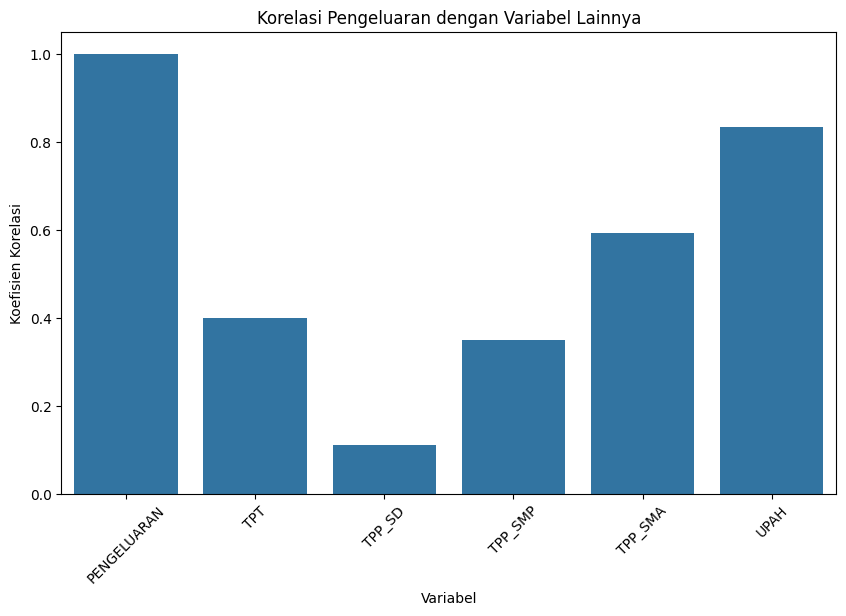

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Baca data CSV
data = pd.read_csv('/content/Data.csv')

# Pilih variabel yang akan diuji korelasinya
data_korelasi = data[['PENGELUARAN', 'TPT', 'TPP_SD', 'TPP_SMP', 'TPP_SMA', 'UPAH']]

# Hitung matriks korelasi
korelasi = data_korelasi.corr()

# Pilih baris yang hanya berisi korelasi dengan 'pengeluaran'
korelasi_pengeluaran = korelasi.loc['PENGELUARAN']

# Buat bar plot untuk visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=korelasi_pengeluaran.index, y=korelasi_pengeluaran.values)
plt.title('Korelasi Pengeluaran dengan Variabel Lainnya')
plt.xlabel('Variabel')
plt.ylabel('Koefisien Korelasi')
plt.xticks(rotation=45)
plt.show()

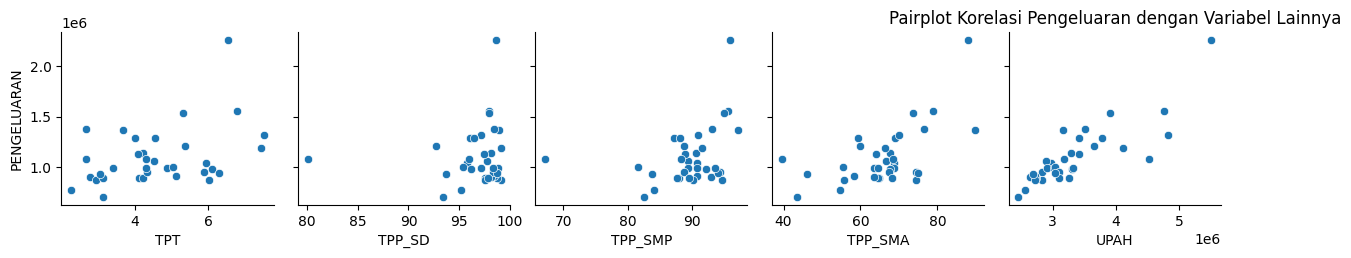

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Baca data CSV
data = pd.read_csv('/content/Data.csv')

# Pilih variabel yang akan diuji korelasinya
data_korelasi = data[['PENGELUARAN', 'TPT', 'TPP_SD', 'TPP_SMP', 'TPP_SMA', 'UPAH']]

# Buat DataFrame baru dengan 'pengeluaran' sebagai kolom pertama
data_pengeluaran = data_korelasi[['PENGELUARAN']].join(data_korelasi.drop('PENGELUARAN', axis=1))

# Buat pairplot
sns.pairplot(data_pengeluaran, x_vars=['TPT', 'TPP_SD', 'TPP_SMP', 'TPP_SMA', 'UPAH'], y_vars='PENGELUARAN', diag_kind='kde')
plt.title('Pairplot Korelasi Pengeluaran dengan Variabel Lainnya')
plt.show()